In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (224, 224)
batch_size = 32
data_dir = r"C:\Users\Semih\frames\split"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory=f"{data_dir}/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = val_test_datagen.flow_from_directory(
    directory=f"{data_dir}/validation",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    directory=f"{data_dir}/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 44349 images belonging to 2 classes.
Found 9362 images belonging to 2 classes.
Found 9365 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
1386/1386 [==============================] - 748s 532ms/step - loss: 0.6093 - accuracy: 0.6592 - val_loss: 0.5177 - val_accuracy: 0.7389 - lr: 1.0000e-04
Epoch 2/10
1386/1386 [==============================] - 626s 451ms/step - loss: 0.5389 - accuracy: 0.7145 - val_loss: 0.4785 - val_accuracy: 0.7507 - lr: 1.0000e-04
Epoch 3/10
1386/1386 [==============================] - 621s 448ms/step - loss: 0.5142 - accuracy: 0.7274 - val_loss: 0.4726 - val_accuracy: 0.7458 - lr: 1.0000e-04
Epoch 4/10
1386/1386 [==============================] - 620s 447ms/step - loss: 0.4991 - accuracy: 0.7340 - val_loss: 0.4721 - val_accuracy: 0.7443 - lr: 1.0000e-04
Epoch 5/10
1386/1386 [==============================] - 629s 454ms/step - loss: 0.4893 - accuracy: 0.7418 - val_loss: 0.4597 - val_accuracy: 0.7543 - lr: 1.0000e-04
Epoch 6/10
1386/1386 [==============================] - 621s 448ms/step - loss: 0.4829 - accuracy: 0.7429 - val_loss: 0.4629 - val_accuracy: 0.7448 - lr: 1.0000e-04
Epoch 7/10

In [3]:
model.save("vgg16_deepfake_mode_faceforensics_last4layer.h5")
print("Model Başarıyla Kaydedildi")

Model Başarıyla Kaydedildi


293/293 [==============================] - 94s 320ms/step
Classification Report:

              precision    recall  f1-score   support

        fake       0.71      0.93      0.81      4280
        real       0.92      0.68      0.79      5085

    accuracy                           0.80      9365
   macro avg       0.82      0.81      0.80      9365
weighted avg       0.83      0.80      0.80      9365



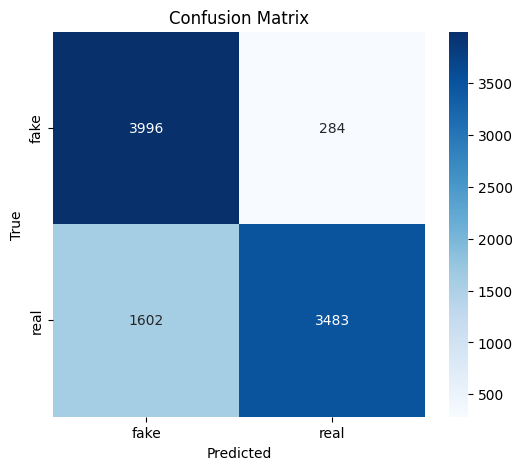

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pred_probs = model.predict(test_generator)
preds = (pred_probs > 0.5).astype("int32").flatten()
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())
print("Classification Report:\n")
print(classification_report(true_labels, preds, target_names=class_names))
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Epoch 1/10
1386/1386 [==============================] - 696s 501ms/step - loss: 0.5683 - accuracy: 0.6878 - val_loss: 0.5056 - val_accuracy: 0.7239
Epoch 2/10
1386/1386 [==============================] - 662s 477ms/step - loss: 0.5137 - accuracy: 0.7245 - val_loss: 0.4746 - val_accuracy: 0.7427
Epoch 3/10
1386/1386 [==============================] - 631s 455ms/step - loss: 0.4972 - accuracy: 0.7354 - val_loss: 0.4696 - val_accuracy: 0.7458
Epoch 4/10
1386/1386 [==============================] - 634s 457ms/step - loss: 0.4881 - accuracy: 0.7384 - val_loss: 0.4666 - val_accuracy: 0.7363
Epoch 5/10
1386/1386 [==============================] - 627s 453ms/step - loss: 0.4848 - accuracy: 0.7396 - val_loss: 0.4705 - val_accuracy: 0.7450
Epoch 6/10
1386/1386 [==============================] - 631s 455ms/step - loss: 0.4767 - accuracy: 0.7438 - val_loss: 0.4611 - val_accuracy: 0.7504
Epoch 7/10
1386/1386 [==============================] - 636s 459ms/step - loss: 0.4754 - accuracy: 0.7440 - val_

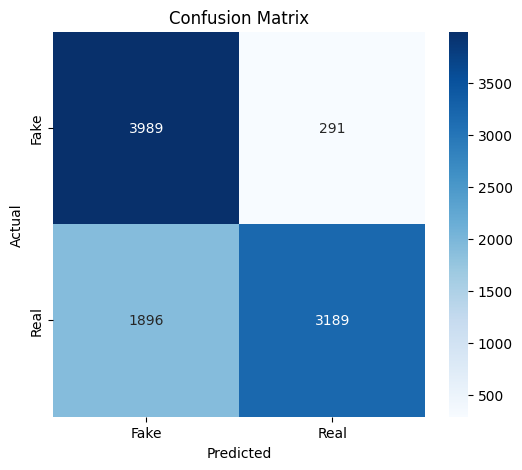

In [5]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False 
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  # Son 30 katmanı aç
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)
pred_probs = model.predict(test_generator)
preds = (pred_probs > 0.5).astype("int32").flatten()
true_labels = test_generator.classes
print(classification_report(true_labels, preds, target_names=["fake", "real"]))
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
model.save("xception_model_finetuned.h5")

Epoch 1/10
1386/1386 [==============================] - 734s 527ms/step - loss: 0.5714 - accuracy: 0.6872 - val_loss: 0.4871 - val_accuracy: 0.7442
Epoch 2/10
1386/1386 [==============================] - 661s 477ms/step - loss: 0.5117 - accuracy: 0.7259 - val_loss: 0.4734 - val_accuracy: 0.7462
Epoch 3/10
1386/1386 [==============================] - 659s 476ms/step - loss: 0.4919 - accuracy: 0.7367 - val_loss: 0.4589 - val_accuracy: 0.7523
Epoch 4/10
1386/1386 [==============================] - 660s 476ms/step - loss: 0.4823 - accuracy: 0.7419 - val_loss: 0.4528 - val_accuracy: 0.7534
Epoch 5/10
1386/1386 [==============================] - 652s 470ms/step - loss: 0.4767 - accuracy: 0.7452 - val_loss: 0.4658 - val_accuracy: 0.7436
Epoch 6/10
1386/1386 [==============================] - 653s 471ms/step - loss: 0.4733 - accuracy: 0.7445 - val_loss: 0.4486 - val_accuracy: 0.7559
Epoch 7/10
1386/1386 [==============================] - 655s 472ms/step - loss: 0.4678 - accuracy: 0.7470 - val_

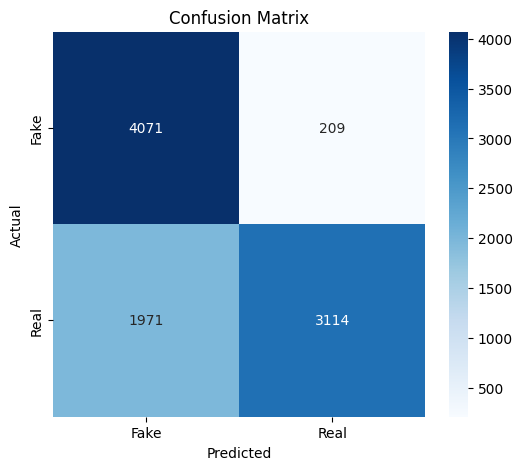

In [7]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_finetune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)
test_pred_probs = model.predict(test_generator)
print(classification_report(true_labels, test_preds, target_names=['fake', 'real']))
cm = confusion_matrix(true_labels, test_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
model.save("densenet121_deepfake_model_finetuned.h5")

Found 44349 images belonging to 2 classes.
Found 9362 images belonging to 2 classes.
Found 9365 images belonging to 2 classes.


C:\Users\Semih\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1386/1386 - 1667s - 1s/step - accuracy: 0.7262 - loss: 0.5197 - val_accuracy: 0.7512 - val_loss: 0.4608
Epoch 2/5
1386/1386 - 1586s - 1s/step - accuracy: 0.7579 - loss: 0.4615 - val_accuracy: 0.7591 - val_loss: 0.4477
Epoch 3/5
1386/1386 - 1597s - 1s/step - accuracy: 0.7634 - loss: 0.4445 - val_accuracy: 0.7569 - val_loss: 0.4385
Epoch 4/5
1386/1386 - 1606s - 1s/step - accuracy: 0.7682 - loss: 0.4369 - val_accuracy: 0.7639 - val_loss: 0.4322
Epoch 5/5
1386/1386 - 1546s - 1s/step - accuracy: 0.7707 - loss: 0.4314 - val_accuracy: 0.7652 - val_loss: 0.4293
Epoch 1/5
1386/1386 - 1597s - 1s/step - accuracy: 0.7751 - loss: 0.4295 - val_accuracy: 0.7743 - val_loss: 0.4144
Epoch 2/5
1386/1386 - 1583s - 1s/step - accuracy: 0.7921 - loss: 0.4000 - val_accuracy: 0.7839 - val_loss: 0.4041
Epoch 3/5
1386/1386 - 1574s - 1s/step - accuracy: 0.8036 - loss: 0.3824 - val_accuracy: 0.7904 - val_loss: 0.3952
Epoch 4/5
1386/1386 - 1570s - 1s/step - accuracy: 0.8141 - loss: 0.3623 - val_accuracy: 

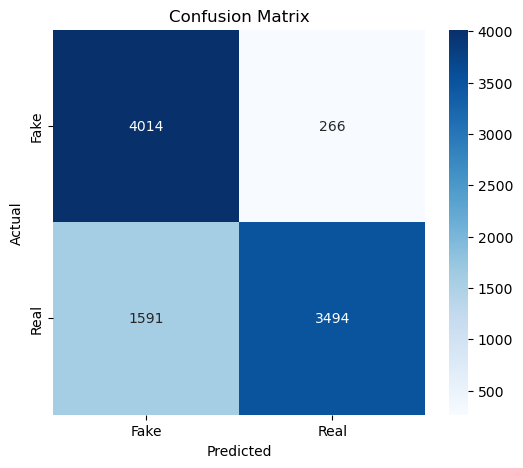

In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
data_dir = r"C:\Users\Semih\frames\split"

train_generator = train_datagen.flow_from_directory(
     directory=f"{data_dir}/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
     directory=f"{data_dir}/validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
     directory=f"{data_dir}/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    verbose=2
)
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    verbose=2
)
test_pred_probs = model.predict(test_generator)
test_preds = (test_pred_probs > 0.5).astype("int32").flatten()
true_labels = test_generator.classes
print(classification_report(true_labels, test_preds, target_names=['fake', 'real']))
cm = confusion_matrix(true_labels, test_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
model.save("inceptionv3_deepfake_model.h5")

C:\Users\Semih\anaconda3\envs\deepfake_vgg16_cuda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1785s 1s/step - accuracy: 0.5490 - loss: 0.7162 - val_accuracy: 0.5430 - val_loss: 0.6913 - learning_rate: 1.0000e-04
Epoch 2/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1599s 1s/step - accuracy: 0.5497 - loss: 0.6905 - val_accuracy: 0.5430 - val_loss: 0.6902 - learning_rate: 1.0000e-04
Epoch 3/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1580s 1s/step - accuracy: 0.5441 - loss: 0.6900 - val_accuracy: 0.5430 - val_loss: 0.6897 - learning_rate: 1.0000e-04
Epoch 4/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1580s 1s/step - accuracy: 0.5496 - loss: 0.6887 - val_accuracy: 0.5430 - val_loss: 0.6895 - learning_rate: 1.0000e-04
Epoch 5/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1582s 1s/step - accuracy: 0.5503 - loss: 0.6884 - val_accuracy: 0.5430 - val_loss: 0.6894 - learning_rate: 1.0000e-04
Epoch 6/10
1386/1386 ━━━━━━━━━━━━━━━━━━━━ 1595s 1s/step - accuracy: 0.5527 - loss: 0.6878 - val_accuracy: 0.5430 - val_loss: 0.6894 - learning_rate: 5.0000e-05
Epoch 7/10
1386/1386 ━━━━━━━━━━━━━━━━━━━

C:\Users\Semih\anaconda3\envs\deepfake_vgg16_cuda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


293/293 ━━━━━━━━━━━━━━━━━━━━ 251s 846ms/step
              precision    recall  f1-score   support

        fake       0.00      0.00      0.00      4280
        real       0.54      1.00      0.70      5085

    accuracy                           0.54      9365
   macro avg       0.27      0.50      0.35      9365
weighted avg       0.29      0.54      0.38      9365



C:\Users\Semih\anaconda3\envs\deepfake_vgg16_cuda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Semih\anaconda3\envs\deepfake_vgg16_cuda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Semih\anaconda3\envs\deepfake_vgg16_cuda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

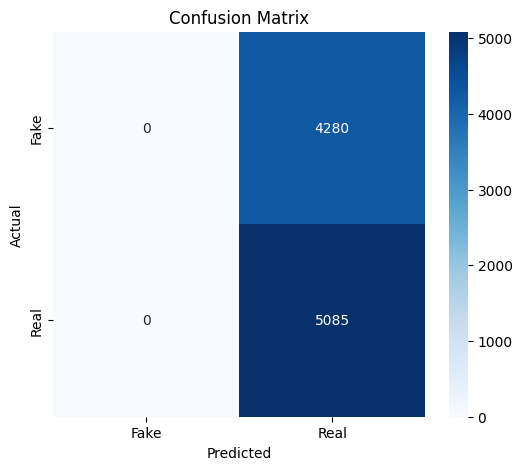

Model Başarıyla Kaydedildi


In [11]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stop, reduce_lr]
)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pred_probs = model.predict(test_generator)
preds = (pred_probs > 0.5).astype("int32").flatten()
true_labels = test_generator.classes
print(classification_report(true_labels, preds, target_names=['fake', 'real']))
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
model.save("efficientnetb3_deepfake_model.h5")
print("Model Başarıyla Kaydedildi")

Found 9365 images belonging to 2 classes.

Classification Report (Ensemble - 3 Models):

              precision    recall  f1-score   support

        fake       0.70      0.95      0.81      4280
        real       0.94      0.66      0.77      5085

    accuracy                           0.79      9365
   macro avg       0.82      0.80      0.79      9365
weighted avg       0.83      0.79      0.79      9365



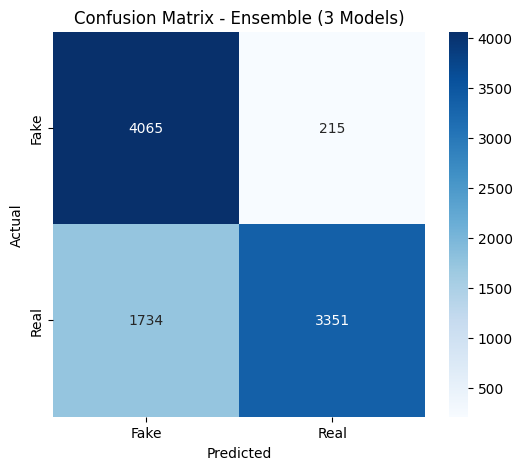

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
vgg_model = load_model('vgg16_deepfake_model.keras')
xception_model = load_model('xception_model_finetuned.keras')
densenet_model = load_model('densenet121_deepfake_model.keras')
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"C:\Users\Semih\frames\split\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
true_labels = test_generator.classes
vgg_probs = vgg_model.predict(test_generator, verbose=0)
xception_probs = xception_model.predict(test_generator, verbose=0)
densenet_probs = densenet_model.predict(test_generator, verbose=0)
avg_probs = (vgg_probs + xception_probs + densenet_probs) / 3
ensemble_preds = (avg_probs > 0.5).astype("int32").flatten()
print("\nClassification Report (Ensemble - 3 Models):\n")
print(classification_report(true_labels, ensemble_preds, target_names=['fake', 'real']))
cm = confusion_matrix(true_labels, ensemble_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble (3 Models)")
plt.show()


Classification Report (Hard Voting - 3 Models):

              precision    recall  f1-score   support

        fake       0.69      0.96      0.80      4280
        real       0.95      0.63      0.76      5085

    accuracy                           0.78      9365
   macro avg       0.82      0.80      0.78      9365
weighted avg       0.83      0.78      0.78      9365



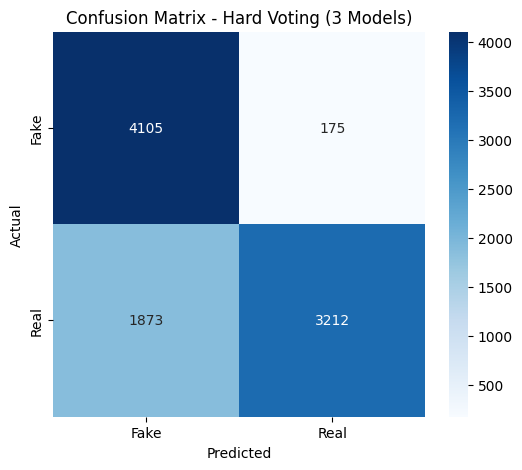

In [11]:
vgg_preds = (vgg_probs > 0.5).astype("int32")
xception_preds = (xception_probs > 0.5).astype("int32")
densenet_preds = (densenet_probs > 0.5).astype("int32")
all_preds = np.concatenate([vgg_preds, xception_preds, densenet_preds], axis=1)
majority_vote = (np.mean(all_preds, axis=1) > 0.5).astype("int32")
print("\nClassification Report (Hard Voting - 3 Models):\n")
print(classification_report(true_labels, majority_vote, target_names=['fake', 'real']))
cm = confusion_matrix(true_labels, majority_vote)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Hard Voting (3 Models)")
plt.show()


Classification Report (Weighted Soft Voting - 3 Models):

              precision    recall  f1-score   support

        fake       0.70      0.95      0.81      4280
        real       0.94      0.66      0.77      5085

    accuracy                           0.79      9365
   macro avg       0.82      0.80      0.79      9365
weighted avg       0.83      0.79      0.79      9365



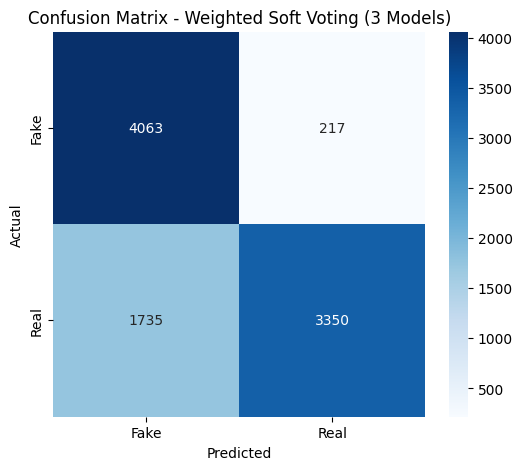

In [12]:
weights = [0.87, 0.89, 0.85]
weighted_avg_probs = (weights[0] * vgg_probs + weights[1] * xception_probs + weights[2] * densenet_probs) / sum(weights)
weighted_ensemble_preds = (weighted_avg_probs > 0.5).astype("int32").flatten()
print("\nClassification Report (Weighted Soft Voting - 3 Models):\n")
print(classification_report(true_labels, weighted_ensemble_preds, target_names=['fake', 'real']))
cm = confusion_matrix(true_labels, weighted_ensemble_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Weighted Soft Voting (3 Models)")
plt.show()